In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [3]:
df = pd.read_csv('emp_turnover.csv')

In [4]:
df[df['attrition']==0]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,attrition
2000,0.58,0.74,4,215,3,0,0,sales,low,0
2001,0.82,0.67,2,202,3,0,0,sales,low,0
2002,0.45,0.69,5,193,3,0,0,sales,low,0
2003,0.78,0.82,5,247,3,0,0,sales,low,0
2004,0.49,0.60,3,214,2,0,0,sales,low,0
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,1,management,high,0
14207,0.74,0.95,5,266,10,0,1,management,high,0
14208,0.85,0.54,3,185,10,0,1,management,high,0
14209,0.33,0.65,3,172,10,0,1,marketing,high,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   attrition              14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,attrition
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
missing_value = pd.DataFrame({
    'Missing Value': df.isnull().sum(),
    'Percentage': (df.isnull().sum() / len(df)) * 100
})
missing_value

,Missing Value,Percentage
satisfaction_level,0,0.0
last_evaluation,0,0.0
number_project,0,0.0
average_montly_hours,0,0.0
time_spend_company,0,0.0
work_accident,0,0.0
promotion_last_5years,0,0.0
department,0,0.0
salary,0,0.0
attrition,0,0.0


In [8]:
pearson_corr = df.corr()
pearson_corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,attrition
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,-0.388375
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.006567
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.023787
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,0.071287
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.144822
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,-0.154622
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,-0.061788
attrition,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,1.000000


<AxesSubplot:>

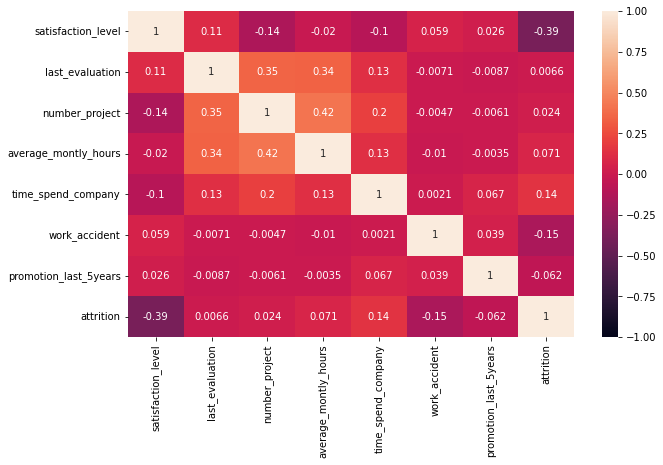

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(pearson_corr, cmap='rocket', annot=True, vmin=-1, vmax=1, center=0)

#### Data Preprocessing

In [10]:
df = pd.get_dummies(df, drop_first=True, columns=['department'])
df = pd.get_dummies(df, drop_first=True, columns=['salary'])

In [11]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,attrition,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,1,0,0,0,0,0,0,0,1,0,1,0
14995,0.37,0.48,2,160,3,0,0,1,0,0,0,0,0,0,0,1,0,1,0
14996,0.37,0.53,2,143,3,0,0,1,0,0,0,0,0,0,0,1,0,1,0
14997,0.11,0.96,6,280,4,0,0,1,0,0,0,0,0,0,0,1,0,1,0


###### Split train and test datsets 

In [12]:
X = df.drop("attrition", axis=1)
y = df['attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

#### Logistic Regression

In [13]:
logistic = LogisticRegression(solver='liblinear')
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Precision: ', metrics.precision_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred))
print('F1-Score: ', metrics.f1_score(y_test, y_pred))
print('\n====================Classification Report====================\n')
print(metrics.classification_report(y_test, y_pred))
print('\n=============================================================\n')

Accuracy:  0.791
Precision:  0.5972850678733032
Recall:  0.3702664796633941
F1-Score:  0.45714285714285713

====================Classification Report====================

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2287
           1       0.60      0.37      0.46       713

    accuracy                           0.79      3000
   macro avg       0.71      0.65      0.66      3000
weighted avg       0.77      0.79      0.77      3000





#### K-nearest Neighbors

In [14]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Precision: ', metrics.precision_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred))
print('F1-Score: ', metrics.f1_score(y_test, y_pred))
print('\n====================Classification Report====================\n')
print(metrics.classification_report(y_test, y_pred))
print('\n=============================================================\n')

Accuracy:  0.9343333333333333
Precision:  0.816953316953317
Recall:  0.9326788218793829
F1-Score:  0.870988867059594

====================Classification Report====================

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      2287
           1       0.82      0.93      0.87       713

    accuracy                           0.93      3000
   macro avg       0.90      0.93      0.91      3000
weighted avg       0.94      0.93      0.94      3000





#### Support Vector Machine

In [15]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Precision: ', metrics.precision_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred))
print('F1-Score: ', metrics.f1_score(y_test, y_pred))
print('\n====================Classification Report====================\n')
print(metrics.classification_report(y_test, y_pred))
print('\n=============================================================\n')

Accuracy:  0.779
Precision:  1.0
Recall:  0.07012622720897616
F1-Score:  0.1310615989515072

====================Classification Report====================

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      2287
           1       1.00      0.07      0.13       713

    accuracy                           0.78      3000
   macro avg       0.89      0.54      0.50      3000
weighted avg       0.83      0.78      0.70      3000





#### Decision Tree

In [16]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Precision: ', metrics.precision_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred))
print('F1-Score: ', metrics.f1_score(y_test, y_pred))
print('\n====================Classification Report====================\n')
print(metrics.classification_report(y_test, y_pred))
print('\n=============================================================\n')

Accuracy:  0.9763333333333334
Precision:  0.929144385026738
Recall:  0.9747545582047685
F1-Score:  0.9514031485284051

====================Classification Report====================

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2287
           1       0.93      0.97      0.95       713

    accuracy                           0.98      3000
   macro avg       0.96      0.98      0.97      3000
weighted avg       0.98      0.98      0.98      3000





#### Extra Trees Classifier

In [17]:
extra_tree = ExtraTreesClassifier()
extra_tree.fit(X_train, y_train)
y_pred = extra_tree.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Precision: ', metrics.precision_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred))
print('F1-Score: ', metrics.f1_score(y_test, y_pred))
print('\n====================Classification Report====================\n')
print(metrics.classification_report(y_test, y_pred))
print('\n=============================================================\n')

Accuracy:  0.9893333333333333
Precision:  0.984352773826458
Recall:  0.97054698457223
F1-Score:  0.9774011299435028

====================Classification Report====================

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2287
           1       0.98      0.97      0.98       713

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000





#### Gradient Boosting Classifier

In [18]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Precision: ', metrics.precision_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred))
print('F1-Score: ', metrics.f1_score(y_test, y_pred))
print('\n====================Classification Report====================\n')
print(metrics.classification_report(y_test, y_pred))
print('\n=============================================================\n')

Accuracy:  0.9776666666666667
Precision:  0.9708454810495627
Recall:  0.9340813464235624
F1-Score:  0.952108649035025

====================Classification Report====================

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2287
           1       0.97      0.93      0.95       713

    accuracy                           0.98      3000
   macro avg       0.98      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000





#### Ada Boost Classifier

In [19]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Precision: ', metrics.precision_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred))
print('F1-Score: ', metrics.f1_score(y_test, y_pred))
print('\n====================Classification Report====================\n')
print(metrics.classification_report(y_test, y_pred))
print('\n=============================================================\n')

Accuracy:  0.9583333333333334
Precision:  0.9164305949008499
Recall:  0.9074333800841514
F1-Score:  0.9119097956307258

====================Classification Report====================

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2287
           1       0.92      0.91      0.91       713

    accuracy                           0.96      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.96      0.96      0.96      3000





#### =>  So Extra Trees Classifier has the most accuracy.

### Prediction with Extra Trees Classifier

In [20]:
observation = [0.32,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0]
# observation= [0.40,0.57,2,151,3,0,0,0,0,0,0,0,0,0,1,0,1,0]
print('============ example:=========== \n')
for idx, col in enumerate(X.columns):
    print('- {} : {}'.format(col, observation[idx]))
# predict
attrition = extra_tree.predict([observation])
print('=> attrition: ', attrition[0])
print('\n=================================')

============ example:=========== 

- satisfaction_level : 0.32
- last_evaluation : 0.53
- number_project : 2
- average_montly_hours : 157
- time_spend_company : 3
- work_accident : 0
- promotion_last_5years : 0
- department_RandD : 0
- department_accounting : 0
- department_hr : 0
- department_management : 0
- department_marketing : 0
- department_product_mng : 0
- department_sales : 1
- department_support : 0
- department_technical : 0
- salary_low : 1
- salary_medium : 0
=> attrition:  1



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


In [21]:
import pickle
pickle.dump(extra_tree, open('model.pkl','wb'))

Save model to model.pkl

In [22]:
0.40,0.57,2,151,3,0,0,0,0,0,0,0,0,0,1,0,1,0

(0.4, 0.57, 2, 151, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0)